In [5]:
"""
in terminal
# 
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Patch
import itertools



In [6]:
# Save to file
# np.save('cov_matrix_artificial.npy', data_model_cov)
# np.save('cov_matrix_pca.npy', data_from_pc3)
# np.save('cov_matrix_raw.npy', df_subset)


## read files:
**1.** artificital covariance matrix using multivariate normal distribution

**2.** covariance matrix obtained by PCA

**3.** covariance matrix of raw data

In [7]:
# # Load from file
# cov_matrix_artificial = np.load('cov_matrix_artificial.npy', allow_pickle=True)
# cov_matrix_pca = np.load('cov_matrix_pca.npy', allow_pickle=True)
# cov_matrix_raw = np.load('cov_matrix_raw.npy', allow_pickle=True)

In [8]:

all_keys = ["d", "tcs", "Lxavg", "dLx", "Favg", "dF",
                 "eps", "eps_Ls", "eps_Rs", "V_acs", "Bhs", "ratioL", "ratioR", "source"]

# Subset you now care about
keys = ['d', 'tcs', 'Lxavg', 'dLx', 'Favg', 'dF', 'eps', 'source']

# --- Load npy arrays ---
cov_matrix_artificial = np.load('cov_matrix_artificial_1e10.npy',allow_pickle=True)
cov_matrix_pca = np.load('cov_matrix_pca_1e10.npy',allow_pickle=True)
cov_matrix_raw = np.load('cov_matrix_raw_1e10.npy', allow_pickle=True)

# --- Convert to DataFrames with original full columns ---
cov_matrix_artificial = pd.DataFrame(cov_matrix_artificial, columns=all_keys[:cov_matrix_artificial.shape[1]])
cov_matrix_pca        = pd.DataFrame(cov_matrix_pca,        columns=all_keys[:cov_matrix_pca.shape[1]])
cov_matrix_raw        = pd.DataFrame(cov_matrix_raw,        columns=all_keys[:cov_matrix_raw.shape[1]])

# --- Now keep only the columns you want (intersect to be safe) ---
keep_cols = [c for c in keys if c in cov_matrix_artificial.columns]

cov_matrix_artificial = cov_matrix_artificial[keep_cols]
cov_matrix_pca        = cov_matrix_pca[keep_cols]
cov_matrix_raw        = cov_matrix_raw[[c for c in keys if c in cov_matrix_raw.columns]]

## Figure 5 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

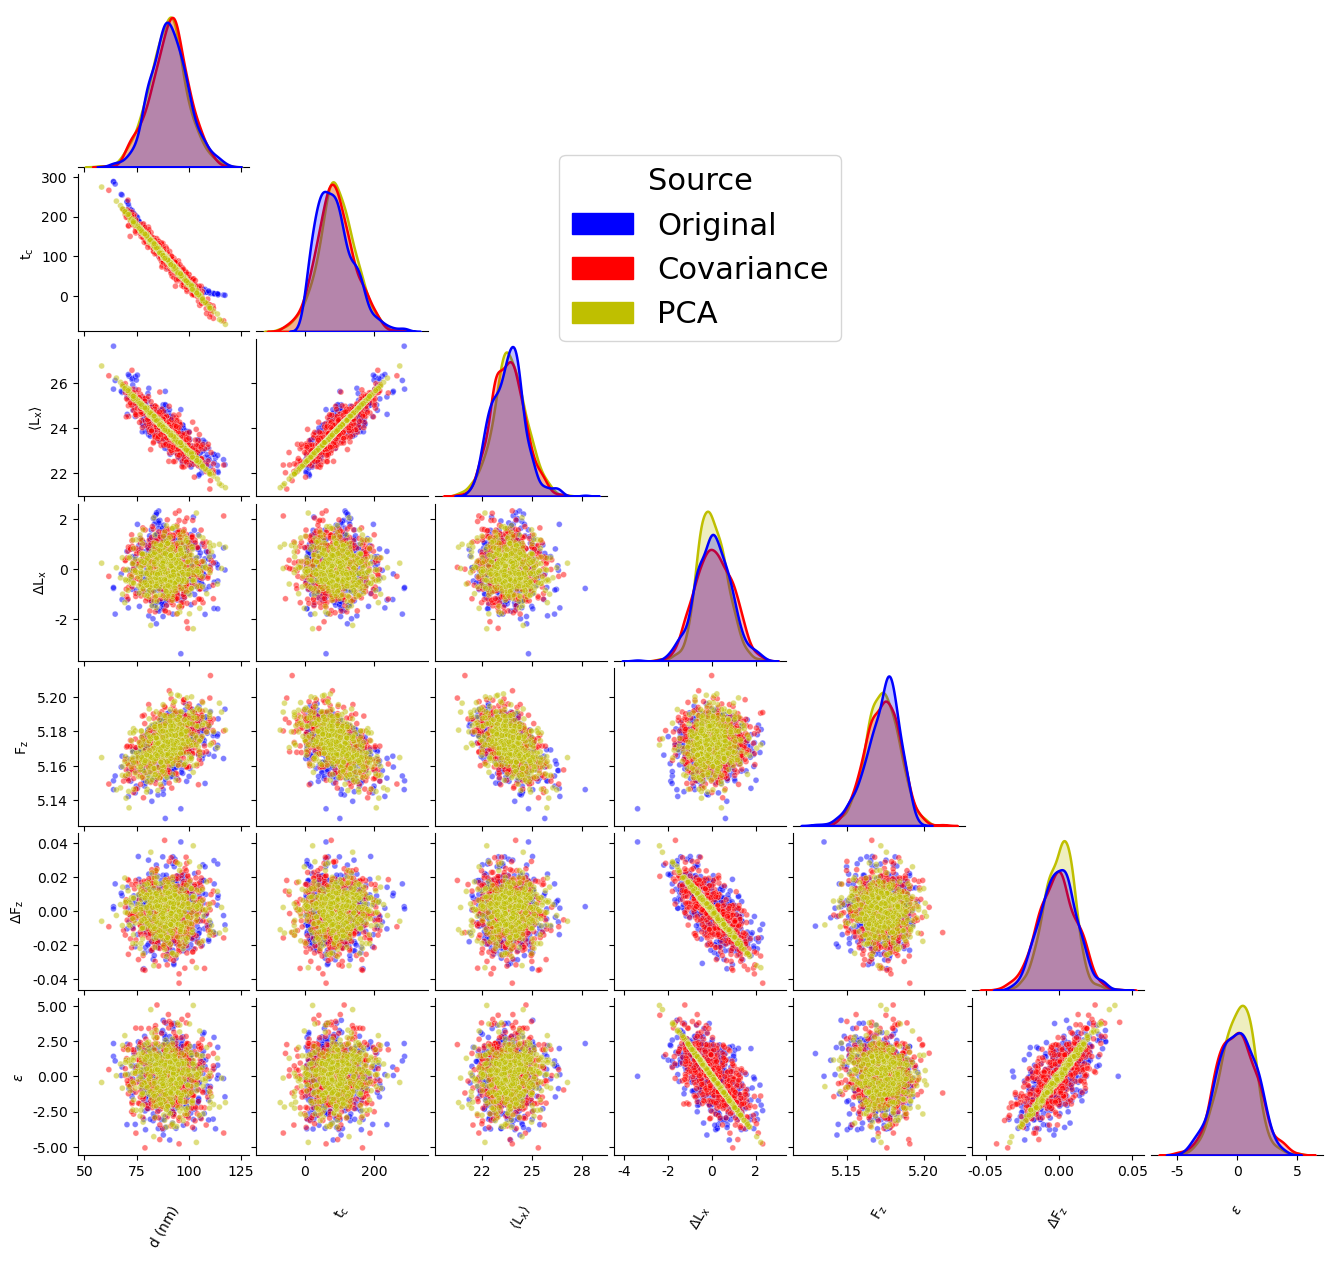

In [9]:
combined_df = pd.concat([cov_matrix_raw, cov_matrix_artificial, cov_matrix_pca], ignore_index=True)


latex_labels = { 
    'tcs': r'$\mathrm{t}_\mathrm{c}$ ', 
    'd': r'$\mathrm{d}$ (nm)',
    'Bhs': r'$\mathrm{B}_\mathrm{h}$ ',
    'Lxavg': r'$\langle \mathrm{L}_\mathrm{x} \rangle$',
    'dLx': r'$\Delta \mathrm{L}_\mathrm{x}$ ', 
    'Favg': r'$ \mathrm{F}_\mathrm{z} $', 
    'dF': r'$\Delta \mathrm{F}_\mathrm{z}$',
    'eps': r'$\epsilon$ ' }






# Use the same cols_to_plot as above
plot_cols = keys[:-1]  # Exclude 'source' from plot columns
plot_labels = [latex_labels.get(col, col) for col in plot_cols]
plot_ylabels = [latex_labels.get(col, col) for col in plot_cols]

palette = {
    "Original":   "b",  # blue
    "Covariance": "r",  # red
    "PCA":        "y",  # green
}

g = sns.pairplot(
    combined_df,
    vars=keys[:-1],  # Exclude 'source' from vars
    hue="source",
    hue_order=["Original", "Covariance", "PCA"],
    palette=palette,
    kind="scatter",
    diag_kind="kde",                 # <- smooth line on the diagonal
    plot_kws=dict(alpha=0.5, s=18),
    diag_kws=dict(
        fill=True,                  # line only (no fill)
        bw_adjust=1.0,               # smoothness (lower=wigglier, higher=smoother)
        linewidth=1.8,
        common_norm=False            # don’t normalize across groups
    ),
    corner=True,
    height=3.2,
    aspect=1
)

# Option A: fixed inches
g.fig.set_size_inches(14, 12)   # (width, height) in inches


xlabels = plot_labels
ylabels = plot_ylabels if 'plot_ylabels' in globals() and plot_ylabels else plot_labels

n = len(xlabels)

# Diagonal: set both x/y to that variable's labels
for i, (xlab, ylab) in enumerate(zip(xlabels, ylabels)):
    ax = g.axes[i, i] if i < g.axes.shape[0] else None
    if ax is not None:
        ax.set_xlabel(xlab)
        ax.set_ylabel(ylab)

# Lower triangle: row i, col j (corner=True → upper triangle is None)
for i in range(n):
    for j in range(i):
        ax = g.axes[i, j]
        if ax is not None:
            ax.set_xlabel(xlabels[j])  # x comes from column variable
            ax.set_ylabel(ylabels[i])  # y comes from row variable
            

# Remove redundant y-labels and x-labels for clarity
for i, j in itertools.product(range(len(plot_cols)), repeat=2):
    ax = g.axes[i, j] if g.axes[i, j] is not None else None
    if ax:
        if j != 0:
            ax.set_ylabel("")
        if i != len(plot_cols) - 1:
            ax.set_xlabel("")
# Fix legend issue: Only add legend if legend_ax is not None

# Move the legend to the empty part of the triangle (top right)
# Find the top-right-most axis (first row, last column used)
for i in range(len(plot_cols)):
    for j in range(len(plot_cols)):
        if i == 0 and j == len(plot_cols) - 1:
            legend_ax = g.axes[i, j]
            break

handles, labels = g._legend_data.values(), g._legend_data.keys()
if legend_ax is not None:
    handles, labels = g._legend_data.values(), g._legend_data.keys()
    legend = legend_ax.legend(
        handles=list(handles),
        labels=list(labels),
        title="Source",
        bbox_to_anchor=(-5, 1.1),
        frameon=True,
        # fontsize=30,
        # title_fontsize=40
    )
    if hasattr(g, "_legend") and g._legend is not None:
        g._legend.remove()  # Remove the default legend


g._legend.remove()  # Remove the default legend


legend_elements = [
    Patch(facecolor="b", edgecolor='b',
          label="Original"),
    Patch(facecolor="r", edgecolor='r',
          label="Covariance"),
    Patch(facecolor="y", edgecolor='y',
          label="PCA"),
]

ax = g.axes[3, 3]

# 1) Centered above this subplot
ax.legend(
    handles=legend_elements, title="Source", frameon=True,
    loc="upper center", bbox_to_anchor=(0.5, 3.22), borderaxespad=0.0, fontsize=22, title_fontsize=22
)



def ticks_have_decimals(ticks):
    """Check if tick values contain decimals."""
    ticks = np.asarray([t for t in ticks if np.isfinite(t)])
    if ticks.size == 0:
        return False
    return np.any(~np.isclose(ticks, np.round(ticks)))


def ticks_are_large(ticks, threshold=10):
    """Check if ticks contain large values (no need for decimals)."""
    ticks = np.asarray([t for t in ticks if np.isfinite(t)])
    if ticks.size == 0:
        return False
    return np.any(np.abs(ticks) >= threshold)


def make_formatter(ndec, use_math):
    """Create a custom tick formatter."""
    if use_math:
        return FuncFormatter(lambda x, pos, ndec=ndec: rf"\mathdefault{{{x:.{ndec}f}}}")
    else:
        return FuncFormatter(lambda x, pos, ndec=ndec: f"{x:.{ndec}f}")


use_math = mpl.rcParams.get("text.usetex", False)

# Run this after creating `g` (before tight_layout or show)
for i in range(len(plot_cols)):
    for j in range(len(plot_cols)):
        ax = g.axes[i, j]
        if ax is None:
            continue

        # X axis
        xticks = ax.get_xticks()
        x_has_dec = ticks_have_decimals(xticks)
        x_large = ticks_are_large(xticks)
        ax.xaxis.set_major_formatter(
            make_formatter(0 if x_large or not x_has_dec else 2, use_math)
        )

        # Y axis
        yticks = ax.get_yticks()
        y_has_dec = ticks_have_decimals(yticks)
        y_large = ticks_are_large(yticks)
        ax.yaxis.set_major_formatter(
            make_formatter(0 if y_large or not y_has_dec else 2, use_math)
        )

# rotate X **axis labels** (the xlabel text you set)
for j in range(len(plot_cols)):
    ax = g.axes[len(plot_cols)-1, j]
    if ax is None:
        continue
    ax.xaxis.label.set_rotation(60)     # rotate the xlabel
    ax.xaxis.set_label_coords(0.5, -0.3)  # nudge down if needed

plt.tight_layout()
# plt.show()